In [1]:
%reload_ext autoreload
%autoreload 2

from dev.dec import load_metadata, organize_jobs_by_calibration_date, retrieve_calib_data, retrieve_memories_and_job_info, get_pSoft_and_countMat
from result_saver import SaverProvider

provider = SaverProvider()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
from soft_info import get_repcode_IQ_map, inv_qubit_mapping

DEVICE = 'ibm_sherbrooke'
LOGICAL = '0'
XBASIS = False
ROUNDS = 100


md = load_metadata(DEVICE, LOGICAL, XBASIS, ROUNDS)
jobs_by_calib_date = organize_jobs_by_calibration_date(md)


calib_date = list(jobs_by_calib_date.keys())[0]   
job_ids = jobs_by_calib_date[calib_date]    


kde_dict, kde_dict_PS, msmt_error_dict, noise_dict = retrieve_calib_data(provider, DEVICE, calib_date)
big_memory, d, T, link_qubits, code_qubits, shots_per_job = retrieve_memories_and_job_info(provider, jobs_by_calib_date[calib_date], md)
inverted_q_map = inv_qubit_mapping(get_repcode_IQ_map(link_qubits+code_qubits, T))

shape md before: (40, 18)
State: Z0 100
shape md: (20, 18)
Calibration dates: dict_keys([datetime.datetime(2024, 3, 23, 16, 44, 31, 639000, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 3, 23, 16, 38, 32, 429000, tzinfo=datetime.timezone.utc)])
Num of calibrations: 2
Num of jobs per calibration: [11, 9]

19:32:47 Warning: Negative T2 error -0.08 % for qubit 38, setting to 0. T1: 6.421500990479847e-05, T2: 0.00015673252358240422. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/Hardware/backend_noise.py, LINE: 54
19:32:47 Warning: Negative T2 error -0.01 % for qubit 39, setting to 0. T1: 0.00013169172467058469, T2: 0.00027539403593426396. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/Hardware/backend_noise.py, LINE: 54
19:32:47 Warning: Negative T2 error -0.01 % for qubit 111, setting to 0. T1: 0.00016588647661947383, T2: 0.00034179903119965343. IN FILE: /Users/mha/My_

In [3]:
import cpp_soft_info as csi
from datetime import datetime

rel_error = 1

print(f"\nStarting to get pSoft at {datetime.now()}")
# pSoft, countMat, estim0Mat, estim1Mat = csi.iqConvertorEstim(big_memory, inverted_q_map, kde_dict, rel_error, -1)
# print(f"Starting to get pSoft_PS at {datetime.now()}")
pSoft_PS, countMat_PS, estim0MatPS, estim1MatPS = csi.iqConvertorEstim(big_memory, inverted_q_map, kde_dict_PS, rel_error, -1)
print(f"Finished getting pSofts at {datetime.now()}\n")


Starting to get pSoft at 2024-04-23 19:35:03.701511
Finished getting pSofts at 2024-04-23 19:39:15.488052



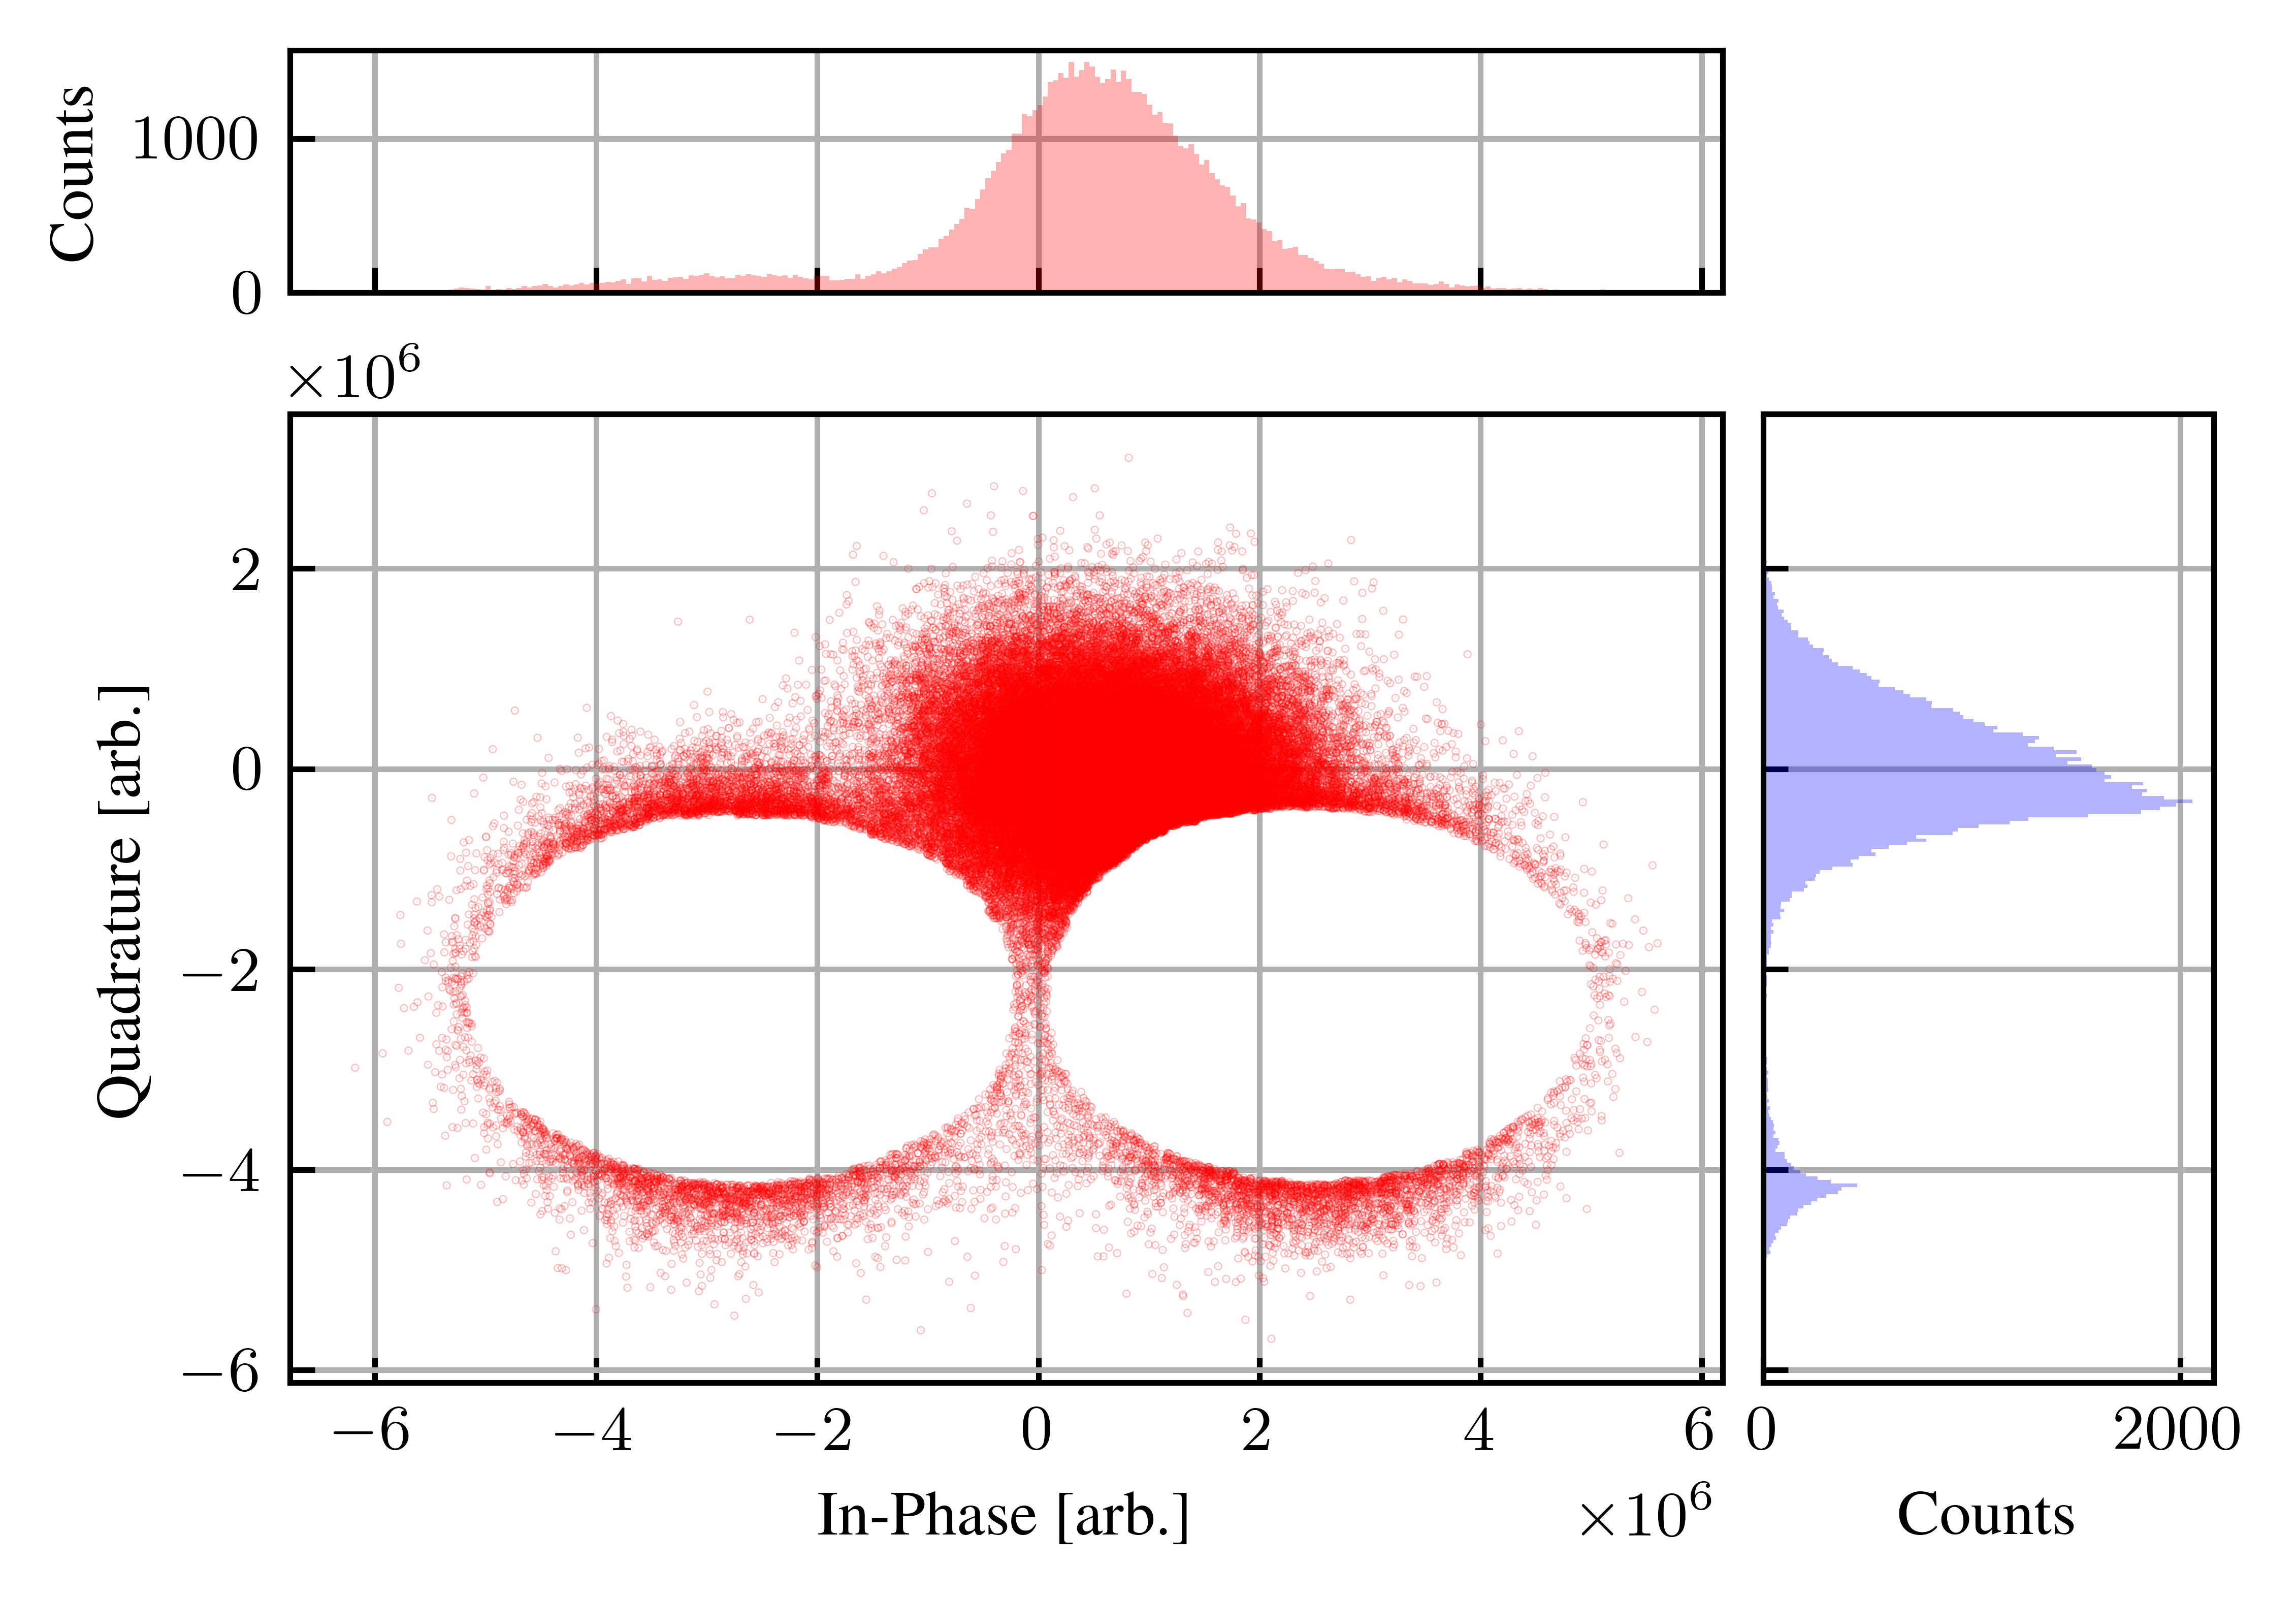

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from soft_info import plot_IQ_data_with_countMat, save_plot

qubit = 3

cols = inverted_q_map[qubit]
estim0Mat_sub = estim0MatPS[:, cols]
estim1Mat_sub = estim1MatPS[:, cols]
pSoft_sub = pSoft_PS[:, cols]
countMat_sub = countMat_PS[:, cols]
countMat_sub = np.ones_like(countMat_sub)

memory_sub = big_memory[:, cols]


threshold = 1e-2
mask = (estim0Mat_sub < threshold) & (estim1Mat_sub < threshold)   

plot = plot_IQ_data_with_countMat(memory_sub[mask], countMat_sub[mask])
save_plot(plot, f"3_soft_information/outlier_detection.png", format='png')
